<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [96]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [97]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [98]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [99]:
df_bookings.shape

(134590, 12)

In [100]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [101]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [102]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

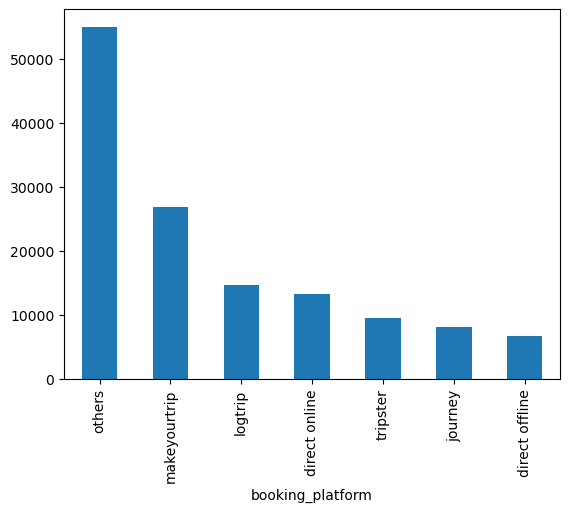

In [103]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [104]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [105]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [106]:
df_hotels.shape

(25, 4)

In [107]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [108]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

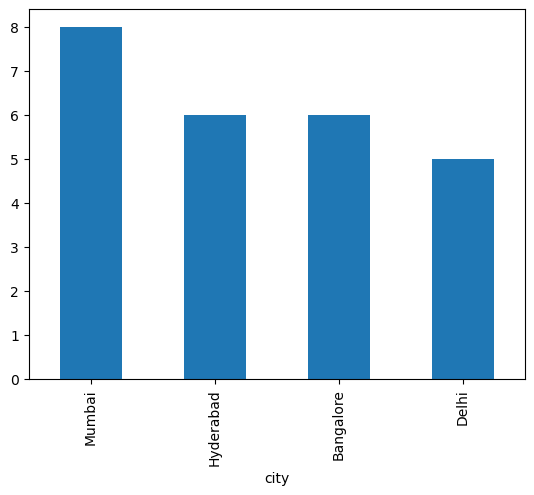

In [109]:
df_hotels.city.value_counts().plot(kind="bar")

***
**Exercise: Explore aggregate bookings**
***

In [110]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-05-2022,RT1,25,30.0
1,19562,01-05-2022,RT1,28,30.0
2,19563,01-05-2022,RT1,23,30.0


**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [111]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**Exercise-2. Find out total bookings per property_id**

In [112]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Exercise-3. Find out days on which bookings are greater than capacity**

In [113]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-05-2022,RT1,30,19.0
12,16563,01-05-2022,RT1,100,41.0
4136,19558,11-06-2022,RT2,50,39.0
6209,19560,02-07-2022,RT1,123,26.0
8522,19559,25-07-2022,RT1,35,24.0
9194,18563,31-07-2022,RT4,20,18.0


**Exercise-4. Find out properties that have highest capacity**

In [114]:
df_agg_bookings.capacity.max()

50.0

In [115]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-05-2022,RT2,38,50.0
128,17558,02-05-2022,RT2,27,50.0
229,17558,03-05-2022,RT2,26,50.0
328,17558,04-05-2022,RT2,27,50.0
428,17558,05-05-2022,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-07-2022,RT2,22,50.0
8828,17558,28-07-2022,RT2,21,50.0
8928,17558,29-07-2022,RT2,23,50.0
9028,17558,30-07-2022,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [116]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [117]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [118]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [119]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [120]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [121]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [122]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [123]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [124]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [125]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [126]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [127]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [128]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [129]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.3586618449

In [130]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [131]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [132]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [133]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [134]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [135]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [136]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-05-2022,RT1,22,NaN
14,17562,01-05-2022,RT1,12,NaN


In [137]:
df_agg_bookings.capacity.median()

25.0

In [138]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [139]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-05-2022,RT1,22,25.0
15,17563,01-05-2022,RT1,21,25.0


**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [140]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-05-2022,RT1,30,19.0
12,16563,01-05-2022,RT1,100,41.0
4136,19558,11-06-2022,RT2,50,39.0
6209,19560,02-07-2022,RT1,123,26.0
8522,19559,25-07-2022,RT1,35,24.0
9194,18563,31-07-2022,RT4,20,18.0


In [141]:
df_agg_bookings.shape

(9200, 5)

In [142]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [143]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-05-2022,RT1,25,30.0
1,19562,01-05-2022,RT1,28,30.0
2,19563,01-05-2022,RT1,23,30.0


In [144]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

You can use following approach to get rid of SettingWithCopyWarning

In [145]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,0.833333
1,19562,01-05-2022,RT1,28,30.0,0.933333
2,19563,01-05-2022,RT1,23,30.0,0.766667


Convert it to a percentage value

In [146]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,83.33
1,19562,01-05-2022,RT1,28,30.0,93.33
2,19563,01-05-2022,RT1,23,30.0,76.67


In [147]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [148]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 502.8+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [149]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,83.33
1,19562,01-05-2022,RT1,28,30.0,93.33
2,19563,01-05-2022,RT1,23,30.0,76.67


In [150]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [151]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-05-2022,RT1,25,30.0,83.33,RT1,Standard
1,19562,01-05-2022,RT1,28,30.0,93.33,RT1,Standard
2,19563,01-05-2022,RT1,23,30.0,76.67,RT1,Standard
3,16558,01-05-2022,RT1,18,19.0,94.74,RT1,Standard


In [152]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard
1,19562,01-05-2022,RT1,28,30.0,93.33,Standard
2,19563,01-05-2022,RT1,23,30.0,76.67,Standard
3,16558,01-05-2022,RT1,18,19.0,94.74,Standard


In [153]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

In [154]:
df[df.room_class=="Standard"].occ_pct.mean()

57.88964285714285

**2. Print average occupancy rate per city**

In [155]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [156]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-05-2022,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-05-2022,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [157]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [158]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday


In [159]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend
1,16559,01-05-2022,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend
2,16559,01-05-2022,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend


In [205]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [161]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type


In [162]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

Series([], Name: occ_pct, dtype: float64)

In [163]:
#df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5: We got new data for the month of august. Append that to existing data**

In [164]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-08-2022,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-08-2022,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-08-2022,Aug-22,W 32,weekeday,23,30,76.67


In [165]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [166]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [167]:
df_august.shape

(7, 13)

In [168]:
df.shape

(9194, 14)

In [169]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9191,16563,31-07-2022,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-07-2022,Jul-22,W 32,weekend,NaN
9192,16563,31-07-2022,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-07-2022,Jul-22,W 32,weekend,NaN
9193,16563,31-07-2022,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,31-07-2022,Jul-22,W 32,weekend,NaN
9194,16559,01-08-2022,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
9195,19562,01-08-2022,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
9196,19563,01-08-2022,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
9197,19558,01-08-2022,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
9198,19560,01-08-2022,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
9199,17561,01-08-2022,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
9200,17564,01-08-2022,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [170]:
latest_df.shape

(9201, 15)

**6. Print revenue realized per city**

In [171]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [172]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [173]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [174]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [175]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday


In [176]:
df_date["mmm yy"].unique()

array(['May-22', 'Jun-22', 'Jul-22'], dtype=object)

In [177]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [178]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [179]:
df_date["date"] = pd.to_datetime(df_date["date"],format='%d-%m-%Y')
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May-22,W 19,weekend
1,2022-05-02,May-22,W 19,weekeday
2,2022-05-03,May-22,W 19,weekeday


In [180]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [181]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], format='%d-%m-%Y')
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,2022-05-01,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,2022-05-01,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-2022,2022-05-01,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [182]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
1,May012216558RT15,16558,27-04-2022,2022-05-01,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
2,May012216558RT16,16558,01-05-2022,2022-05-01,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend


In [183]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul-22    572843348
Jun-22    553925855
May-22    581767396
Name: revenue_realized, dtype: int64

**Exercise-1. Print revenue realized per hotel type**

In [184]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [185]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()


property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

**Exercise-2 Print average rating per city**

<Axes: xlabel='city'>

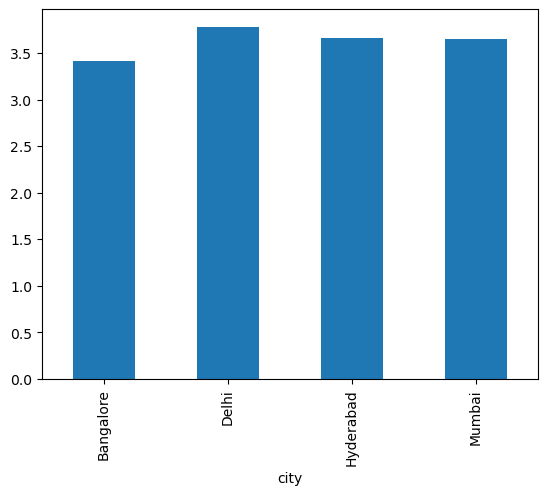

In [191]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2).plot(kind="bar")


**Exercise-3 Printing a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

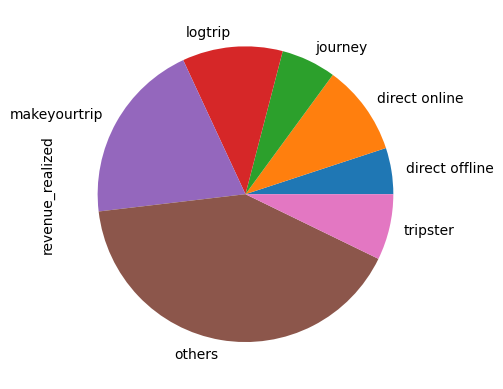

In [187]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")

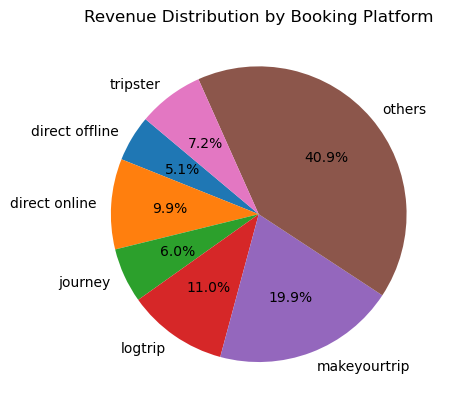

In [190]:
import matplotlib.pyplot as plt
revenue_by_platform = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

# Plotting the pie chart
revenue_by_platform.plot(kind="pie", 
                         autopct='%1.1f%%',  # Display percentage on the pie chart
                         startangle=140,     # Starting angle of the pie chart
                         legend=False,        # Show legend
                         ylabel='',          # Hide the y-axis label
                         title='Revenue Distribution by Booking Platform')  # Add a title

plt.show()

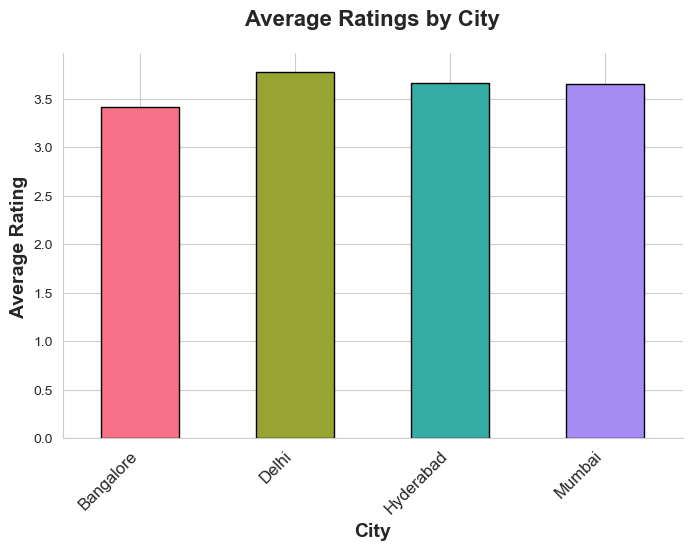

In [197]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style("whitegrid")

# Group by city and calculate the mean ratings
mean_ratings_by_city = df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

# Create a color palette
colors = sns.color_palette("husl", len(mean_ratings_by_city))

# Plot the bar chart
mean_ratings_by_city.plot(kind="bar",
                          color=colors,   # Apply the color palette
                          edgecolor='black',  # Add edge color to bars
                          figsize=(8, 5))    # Set the figure size

# Add title and labels
plt.title('Average Ratings by City', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('City', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Remove the top and right spines
sns.despine()

# Display the plot
plt.show()


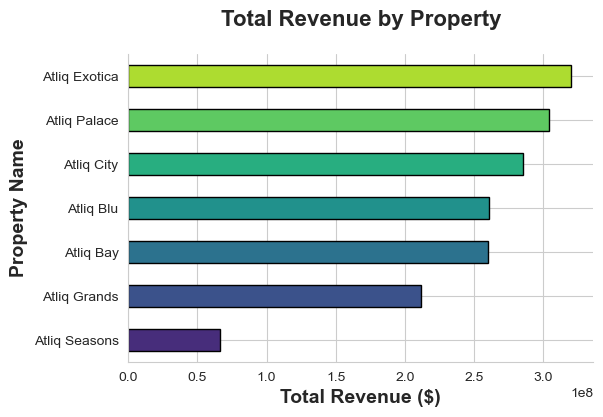

In [194]:
# Group by property name, sum the revenue, round it to 2 decimals, and sort
revenue_by_property = df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

# Set the style for the plot
sns.set_style("whitegrid")

# Create a color palette
colors = sns.color_palette("viridis", len(revenue_by_property))

# Plot the bar chart
revenue_by_property.plot(kind="barh",
                         color=colors,   # Apply the color palette
                         edgecolor='black',  # Add edge color to bars
                         figsize=(6, 4))    # Set the figure size

# Add title and labels
plt.title('Total Revenue by Property', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Revenue ($)', fontsize=14, fontweight='bold')
plt.ylabel('Property Name', fontsize=14, fontweight='bold')

# Remove the top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.show()


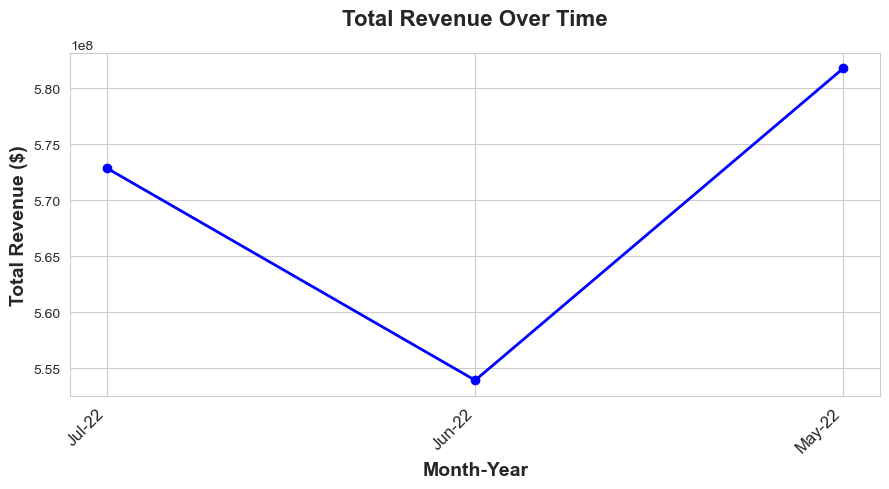

In [200]:
# Group by 'mmm yy' and sum the revenue
revenue_by_month = df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

# Set the style for the plot
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(9, 5))
plt.plot(revenue_by_month.index, revenue_by_month.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add title and labels
plt.title('Total Revenue Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid for better readability
plt.grid(True)

# Show plot with tight layout
plt.tight_layout()
plt.show()


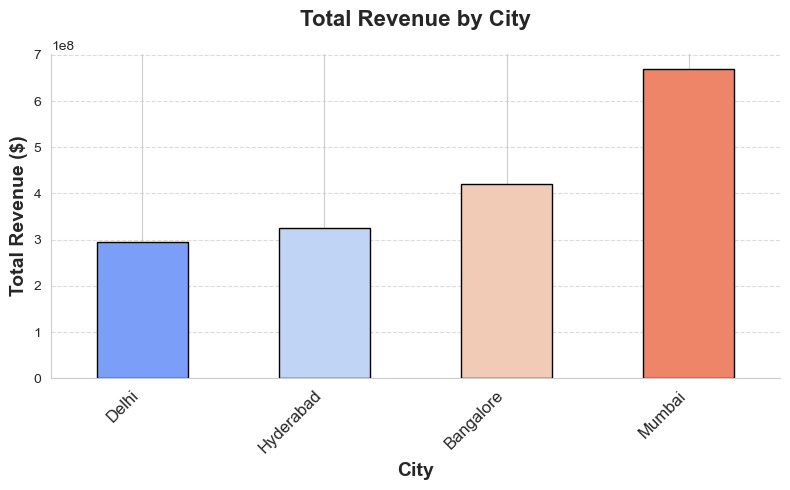

In [203]:
# Group by city and sum the revenue
revenue_by_city = df_bookings_all.groupby("city")["revenue_realized"].sum()

# Set the style for the plot
sns.set_style("whitegrid")

# Create a color palette
colors = sns.color_palette("coolwarm", len(revenue_by_city))

# Plot the bar chart
plt.figure(figsize=(8, 5))
revenue_by_city.sort_values().plot(kind="bar", color=colors, edgecolor='black')

# Add title and labels
plt.title('Total Revenue by City', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('City', fontsize=14, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=14, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for a cleaner look
sns.despine()

# Show plot with tight layout
plt.tight_layout()
plt.show()
